# Analytical Report: Liquor Sales Analysis

The goal of this report is to analyze liquor sales data from Iowa, USA, for the period 2016-2019.
We will focus on identifying the most popular items per zipcode and calculating the sales percentage per store.

## 1. Data Extraction and Cleaning



### 📦 Data Extraction from SQL (2016–2019)

Before diving into the analysis, I extracted a subset of the full liquor sales database which originally contained records beyond the scope of this project.

To focus on the years **2016 to 2019**, I used **MySQL Workbench** to run a SQL query that filtered the data accordingly.

#### 🔍 SQL Query Used:
```sql
SELECT *
FROM finance_liquor_sales
WHERE date BETWEEN '2016-01-01' AND '2019-12-31'
ORDER BY date ASC;
```

#### 💾 Exporting to CSV
After running the query in **MySQL Workbench**, I used the built-in export functionality to save the filtered results as a CSV file:

**Filename:** `finance_liquor_sales_2016_2019.csv`

This CSV file was then imported into Python for data cleaning, exploration, and visualization in the following sections.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("finance_liquor_sales_2016_2019.csv")

# Displaying the first few rows of the dataset
df.head()


,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,S30192200003,2016-01-13 00:00:00,3772,Shop N Save #1 / Mlk Pkwy,2127 M L KING JR PKWY,DES MOINES,50314.0,NaN,77,Polk,...,56193,Paul Masson Peach Grande Amber Brandy,24,200,1.96,2.94,24,70.56,4.8,1.27
1,S30234800064,2016-01-15 00:00:00,4829,Central City 2,1501 MICHIGAN AVE,DES MOINES,50314.0,POINT (-93.613739 41.60572),77,Polk,...,86251,Juarez Triple Sec,12,1000,2.42,3.63,60,217.80,60.0,15.85
2,S30348700047,2016-01-25 00:00:00,3162,Nash Finch / Wholesale Food,807 GRANDVIEW,MUSCATINE,52761.0,POINT (-91.06411300000002 41.408437),70,Muscatine,...,82847,Dekuyper Peachtree,12,1000,7.62,11.43,4,45.72,4.0,1.06
3,S30390600011,2016-01-26 00:00:00,2641,Hy-Vee Drugstore / Council Bluffs,757 W BROADWAY,COUNCIL BLUFFS,51501.0,POINT (-95.855054 41.261673),78,Pottawattamie,...,81124,99 Peppermint Mini,10,600,5.94,8.91,2,17.82,1.2,0.32
4,S30466200002,2016-02-01 00:00:00,2633,Hy-Vee #3 / BDI / Des Moines,3221 SE 14TH ST,DES MOINES,50320.0,POINT (-93.596754 41.554101),77,Polk,...,973627,Di Amore Quattro Orange,12,1000,9.75,14.63,120,1755.60,120.0,31.70


In [60]:
#Identifying the null values
df.isnull().sum()

invoice_and_item_number    0
date                       0
store_number               0
store_name                 0
address                    0
city                       0
zip_code                   0
store_location             9
county_number              0
county                     0
category                   0
category_name              6
vendor_number              0
vendor_name                0
item_number                0
item_description           0
pack                       0
bottle_volume_ml           0
state_bottle_cost          0
state_bottle_retail        0
bottles_sold               0
sale_dollars               0
volume_sold_liters         0
volume_sold_gallons        0
dtype: int64

In [61]:
# Α statistical summary of the DataFrame
df.describe()

,store_number,zip_code,county_number,category,vendor_number,item_number,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
count,74.000000,74.000000,74.000000,7.400000e+01,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,3706.472973,51185.756757,51.445946,1.114542e+06,287.486486,117115.635135,14.175676,756.756757,7.829865,11.746622,76.148649,827.921351,72.226622,19.078514
std,1193.348520,900.102564,29.430737,1.838894e+05,162.181975,227020.971218,8.235170,413.602145,6.413200,9.619979,157.586478,1429.173301,165.173543,43.633755
min,2178.000000,50010.000000,3.000000,1.011500e+06,35.000000,168.000000,3.000000,50.000000,0.890000,1.340000,1.000000,6.750000,0.200000,0.050000
25%,2616.750000,50320.000000,23.500000,1.052100e+06,77.500000,43031.000000,12.000000,375.000000,4.255000,6.382500,5.000000,46.102500,4.000000,1.060000
50%,3536.500000,50754.000000,57.000000,1.081100e+06,370.000000,60971.500000,12.000000,750.000000,5.730000,8.595000,24.000000,206.640000,7.800000,2.060000
75%,4761.500000,52163.000000,77.000000,1.081650e+06,421.000000,82682.000000,12.000000,1000.000000,8.937500,13.407500,70.500000,713.340000,60.000000,15.850000
max,9001.000000,52804.000000,97.000000,1.901200e+06,566.000000,986845.000000,48.000000,1750.000000,29.920000,44.880000,900.000000,6750.000000,900.000000,237.750000


In [62]:
# Shape of the DataFrame
df.shape

(74, 24)

In [63]:
# Replace missing (NaN) values in specific columns with default values
df.fillna({
    'store_location': 'Unknown',
    'county_number': 0,
    'county': 'Unknown',
    'category': 0,
    'category_name':'Unknown'
}, inplace=True)

#Converting the "Date" column to datetime type
df['date'] = pd.to_datetime(df['date'])

# Checking the changes
df.isnull().sum()

invoice_and_item_number    0
date                       0
store_number               0
store_name                 0
address                    0
city                       0
zip_code                   0
store_location             0
county_number              0
county                     0
category                   0
category_name              0
vendor_number              0
vendor_name                0
item_number                0
item_description           0
pack                       0
bottle_volume_ml           0
state_bottle_cost          0
state_bottle_retail        0
bottles_sold               0
sale_dollars               0
volume_sold_liters         0
volume_sold_gallons        0
dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_and_item_number  74 non-null     object        
 1   date                     74 non-null     datetime64[ns]
 2   store_number             74 non-null     int64         
 3   store_name               74 non-null     object        
 4   address                  74 non-null     object        
 5   city                     74 non-null     object        
 6   zip_code                 74 non-null     float64       
 7   store_location           74 non-null     object        
 8   county_number            74 non-null     int64         
 9   county                   74 non-null     object        
 10  category                 74 non-null     int64         
 11  category_name            74 non-null     object        
 12  vendor_number            74 non-null  

## 2. Data Analysis

For the period 2016–2019, we performed a series of revenue-based analyses to extract actionable insights.

---

### 2.1 Most Popular Item per Zip Code

To determine the most popular liquor product in each zip code, we adopted a revenue-based approach. Specifically, we aggregated the total sales in dollars (`sale_dollars`) for each unique combination of `zip_code` and `item_description`.

This was implemented using the `groupby()` function, grouping by `zip_code` and `item_description`, followed by a `sum()` of `sale_dollars`. The result was then sorted in descending order of revenue, and using `drop_duplicates(subset='zip_code')`, we selected the top-selling item per zip code.

This approach allows us to identify the item that generated the highest revenue in each zip code during the selected period (2016–2019), which we define as the "most popular" item from a business perspective.

**Rationale for Using Revenue (`sale_dollars`):**

- **More meaningful in business terms:** Revenue reflects not only purchase frequency but also product price, making it a better indicator of financial impact.
- **Avoids bias from small-value, high-frequency items:** Frequency-based methods may highlight cheaper products that are sold often but have minimal financial contribution.
- **Aligned with the project objectives:** Since the second task also involves computing revenue-based percentages, it makes sense to maintain consistency in metrics.

---





In [66]:
#Identify the most popular item per zipcode
popular_items = (
    df.groupby(['zip_code', 'item_description'])['sale_dollars']
    .sum()
    .reset_index()
    .sort_values(['zip_code', 'sale_dollars'], ascending=[True, False])
    .drop_duplicates(subset='zip_code', keep='first'))

print('The most popular item per zipcode (2016–2019):')
print(popular_items)

The most popular item per zipcode (2016–2019):
    zip_code                               item_description  sale_dollars
0    50010.0                       Member's Mark Spiced Rum       3913.92
1    50022.0                           Paramount Triple Sec         23.04
2    50111.0                     Saints N Sinners Apple Pie       1296.00
3    50131.0                              Platinum 7x Vodka         64.32
4    50158.0                                    Hennessy VS        206.64
7    50263.0                  Jagermeister w/2 Shot Glasses       1518.72
8    50265.0                                  Kahlua Coffee       1349.28
9    50266.0  Avion Silver w/Powell & Mahoney Margarita Mix       3372.30
10   50314.0                             Hennessy Vs Cognac       1709.40
14   50316.0                                    Hennessy VS        413.28
15   50317.0          Paul Masson Peach Grande Amber Brandy         70.56
17   50320.0               Glen Oaks Whiskey Buy the Barrel      

### 2.2 Sales Percentage per Store

We calculated the total sales per store by aggregating the `sale_dollars` for each `store_name`. We then computed each store’s share of total revenue by dividing each store’s sales by the overall sales during the period and then multiple by 100.

This analysis highlights the most profitable stores across the state and can guide strategic decisions related to inventory, staffing, and marketing allocation.

In [68]:
# Calculate the percentage of sales by store
total_sales_by_store = df.groupby('store_name')['sale_dollars'].sum()
total_sales = total_sales_by_store.sum()
sales_percentage_by_store = (total_sales_by_store / total_sales) * 100

print('Sales Percentage by Store (2016–2019):')
print(sales_percentage_by_store.sort_values(ascending=False))

Sales Percentage by Store (2016–2019):
store_name
Wilkie Liquors                        18.967724
Sam's Club 6432 / Sioux City          10.839651
Sam's Club 6514 / Waterloo             8.486509
Hy-Vee #3 / BDI / Des Moines           6.731348
Sam's Club 6568 / Ames                 6.388386
                                        ...    
Hy-Vee Drugstore / Council Bluffs      0.029086
Food Land Super Markets                0.021643
Double D Liquor Store                  0.015898
Hy-Vee Wine and Spirits / Waterloo     0.011426
Bootleggin' Barzini's Fin              0.011017
Name: sale_dollars, Length: 61, dtype: float64


### 2.3 Sales Calculation per Product (2016–2019)

We computed the total sales by product (`item_description`) during the selected period to identify the highest-grossing products overall.

This provides a clear ranking of products by revenue, helping stakeholders understand consumer preferences and product performance at scale.

In [70]:
# Sales calculation per product for the period 2016-2019
sales_by_product = df.groupby('item_description')['sale_dollars'].sum().sort_values(ascending=False)

print('Sales Calculation per Product (2016–2019):')
print(sales_by_product.sort_values(ascending=False))

Sales Calculation per Product (2016–2019):
item_description
Juarez Gold Dss                                  11620.80
Tortilla Gold Dss                                 6011.76
Kahlua Coffee Liqueur                             5397.60
Member's Mark Spiced Rum                          3913.92
Cedar Ridge Single Malt Single Barrel Select      3712.50
Avion Silver w/Powell & Mahoney Margarita Mix     3372.30
Bacardi Gold Rum PET                              2295.00
Pinnacle Peach w/ Punch Dispenser                 1985.40
Glen Oaks Whiskey Buy the Barrel                  1881.00
Juarez Triple Sec                                 1807.74
Di Amore Quattro Orange                           1755.60
Hennessy Vs Cognac                                1709.40
Titos Vodka                                       1563.84
Kahlua Coffee                                     1539.67
Jagermeister w/2 Shot Glasses                     1518.72
Jameson                                           1349.40
Saints N Sin

### 2.4 Total Sales by Zip Code (2016–2019)

To identify the regions with the highest sales volume, we aggregated `sale_dollars` by `zip_code`.

This analysis supports geographic segmentation and can guide marketing strategies and distribution efforts based on regional demand.

In [72]:
# Calculation of total sales by zip code for the period 2016-2019
sales_by_zip = df.groupby('zip_code')['sale_dollars'].sum()

print('Τotal Sales by Zip Code (2016–2019):')
print(sales_by_zip.sort_values(ascending=False))

Τotal Sales by Zip Code (2016–2019):
zip_code
52314.0    11620.80
51106.0     6641.04
50702.0     6007.20
50320.0     4124.04
50010.0     3913.92
52338.0     3712.50
50266.0     3372.30
50314.0     2767.80
50327.0     2295.00
50703.0     2262.15
50501.0     1563.84
50263.0     1518.72
50707.0     1349.40
50265.0     1349.28
50111.0     1296.00
50401.0      900.24
51401.0      769.98
52402.0      733.20
52240.0      706.32
52241.0      510.75
52411.0      486.00
50316.0      413.28
50158.0      394.65
51360.0      324.96
50461.0      324.00
51501.0      293.48
52601.0      288.24
52732.0      282.24
52627.0      237.24
50662.0      105.04
50701.0       87.49
52136.0       75.12
50801.0       71.25
50317.0       70.56
50131.0       64.32
52001.0       50.36
52761.0       45.72
52003.0       41.55
51246.0       37.50
50588.0       33.00
50022.0       23.04
52556.0       21.78
51247.0       21.00
52803.0       18.90
52804.0       17.98
51555.0       13.26
52172.0        9.74
Name: sale_dol

### 2.5 Total Sales by Category (2016–2019)

We also examined sales distribution across product categories (`category_name`) by summing the total `sale_dollars` per category.

This highlights which liquor categories contribute most to overall revenue, informing purchasing and promotion strategies.

In [74]:
# Calculate total sales by category for the period 2016-2019
total_sales_by_category = df.groupby('category_name')['sale_dollars'].sum()

print('Total Sales by Category (2016–2019):')
print(total_sales_by_category.sort_values(ascending=False))

Total Sales by Category (2016–2019):
category_name
DISTILLED SPIRITS SPECIALTY            11825.76
Imported Distilled Spirit Specialty     8084.38
Coffee Liqueurs                         8021.13
DECANTERS & SPECIALTY PACKAGES          6876.42
Special Order Items                     4721.76
SINGLE MALT SCOTCH                      3712.50
Gold Rum                                2972.25
Unknown                                 2859.24
100 PROOF VODKA                         2097.12
Iowa Distillery Whiskies                1881.00
Triple Sec                              1809.46
IRISH WHISKIES                          1349.40
American Distilled Spirit Specialty     1296.00
Neutral Grain Spirits Flavored          1005.28
TRIPLE SEC                               740.52
Straight Rye Whiskies                    637.74
Neutral Grain Spirits                    504.90
STRAIGHT RYE WHISKIES                    488.52
PEACH BRANDIES                           141.12
American Vodka                       

### 2.6 Sales by Year (2016-2019)

To identify overall trends in sales performance over time, we performed a time-based aggregation. Specifically, we grouped the data by year and calculated the total sales per year.

-**2016** had the highest total sales, surpassing **$38,000**.

-A significant drop followed in **2017** and **2018**.

-In **2019**, sales started to recover, exceeding **$15,000**.

This suggests a strong initial year, followed by a downturn and a partial rebound.


In [76]:
# Create a copy of the filtered DataFrame to avoid modifying the original data
df_yearly = df.copy()

# Ensure the 'date' column is in datetime format
df_yearly['date'] = pd.to_datetime(df_yearly['date'])

# Extract the year from the 'date' column and create a new column named 'year'
df_yearly['year'] = df_yearly['date'].dt.year

# Group by the 'year' column and calculate the total sales per year
sales_by_year = df_yearly.groupby('year')['sale_dollars'].sum().reset_index()

# Print the total sales per year (2016–2019)
print('Sales by year (2016-2019):')
print(sales_by_year)

Sales by year (2016-2019):
   year  sale_dollars
0  2016      35697.36
1  2017       3510.08
2  2018       6662.75
3  2019      15395.99


## 3. Data Visualization

To better understand the patterns and trends in the dataset, we created several visualizations focused on product performance, regional sales distribution, and store contributions. All visualizations cover the period 2016–2019.

---

### 3.1 Sales Percentage by Store (Top 10)

This bar plot is used to illustrate the percentage of total revenue attributed to the ten most profitable stores. This allows for quick identification of high-performing retail locations.


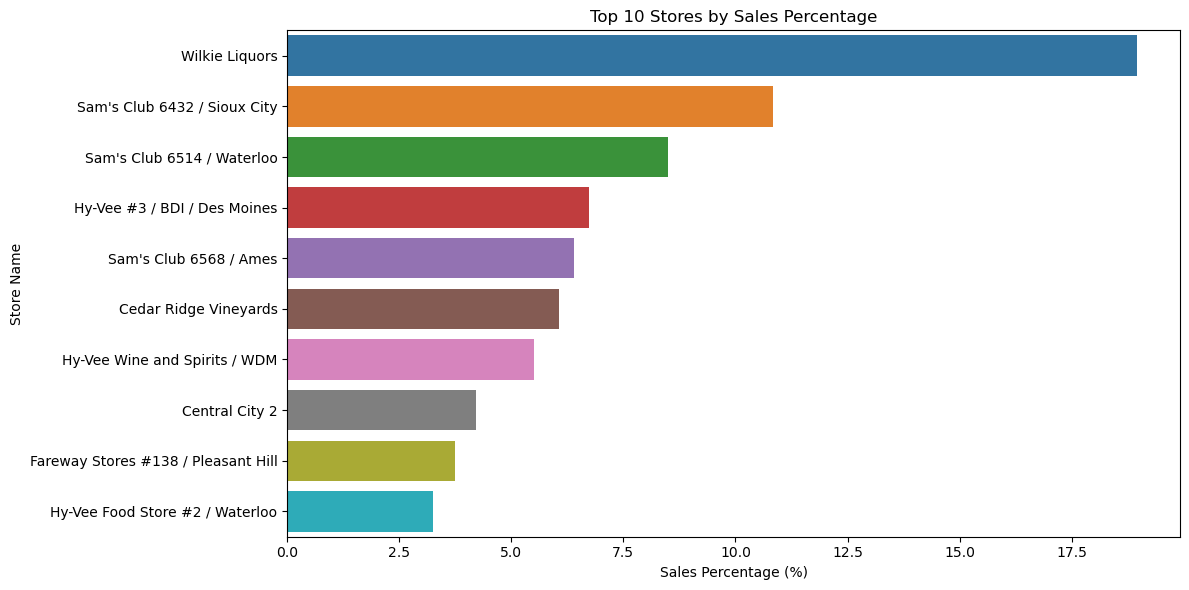

In [78]:
# Create a DataFrame from the Series
#Top 10 Stores
sales_percentage_df = sales_percentage_by_store.sort_values(ascending=False).head(10).reset_index()
sales_percentage_df.columns = ['Store Name', 'Sales Percentage']

# Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=sales_percentage_df,
    x='Sales Percentage',
    y='Store Name')

plt.title('Top 10 Stores by Sales Percentage')
plt.xlabel('Sales Percentage (%)')
plt.ylabel('Store Name')
plt.tight_layout()
plt.show()

### 3.2 Products by Sales (Top 10)

This bar plot displays the ten highest-grossing liquor products based on total revenue. It helps identify consumer favorites and high-impact products for strategic stocking decisions.

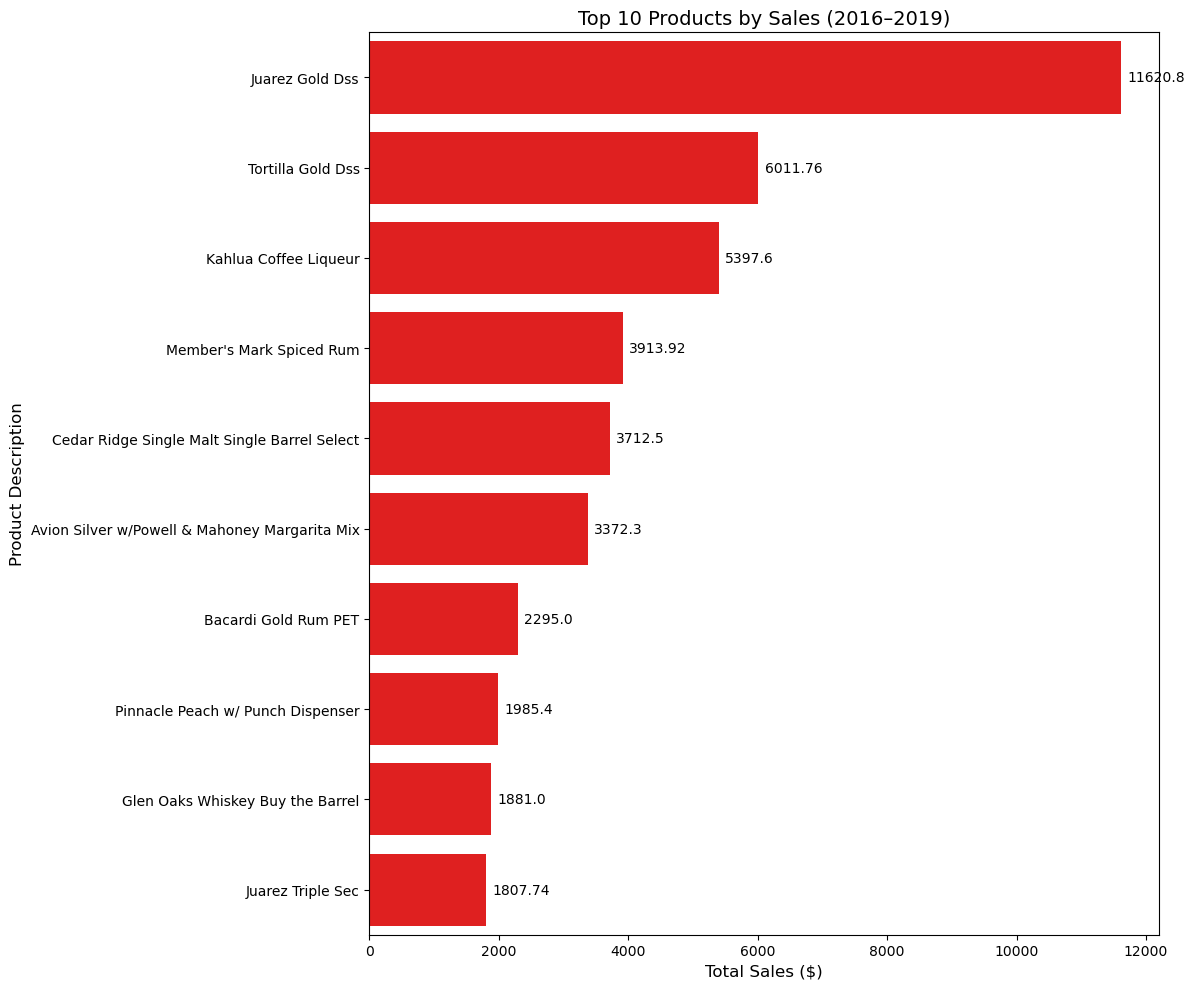

In [80]:
# Top 10 products for the period 2016-2019
top_products = sales_by_product.sort_values(ascending=False).head(10).reset_index()

#Bar Plot
plt.figure(figsize=(12, 10))
sns.barplot(
    data=top_products,
    y='item_description',
    x='sale_dollars',
    color='red')

# Adding values on the bars
for index, value in enumerate(top_products['sale_dollars']):
    plt.text(value + 100, index, f'{round(value, 2)}', ha='left', va='center')

# Adding title and labels
plt.title('Top 10 Products by Sales (2016–2019)', fontsize=14)
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('Product Description', fontsize=12)

plt.tight_layout()
plt.show()

### 3.3 Zip Codes by Sales (Top 10)

We visualize the top zip codes by total revenue to highlight geographic areas with the highest demand. This is useful for regional marketing and logistics optimization.

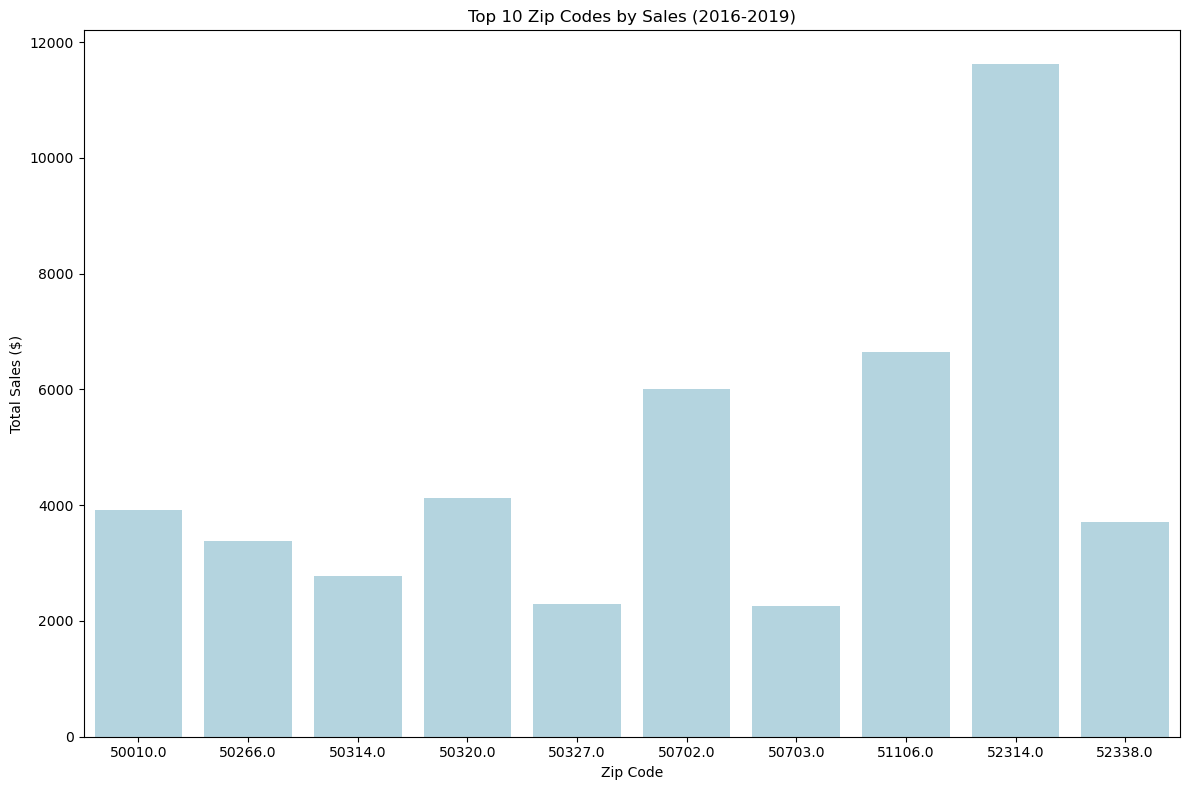

In [82]:
# Create a DataFrame from the Series
# Top 10 zip codes by sales
top_10_zip_codes = sales_by_zip.sort_values(ascending=False).head(10).reset_index()
top_10_zip_codes.columns=['Zip Code', 'Total Sales']

#Barplot
plt.figure(figsize=(12, 8))
sns.barplot(x='Zip Code', y='Total Sales', data=top_10_zip_codes, color='lightblue')

# Adding labels and title
plt.title('Top 10 Zip Codes by Sales (2016-2019)')
plt.xlabel('Zip Code')
plt.ylabel('Total Sales ($)')

plt.tight_layout()
plt.show()


### 3.4 Total Sales by Category (Top 10)

This bar plot shows the total sales across the top 10 liquor categories, revealing which types of alcoholic beverages are most lucrative. This informs category-level investment and promotional planning.

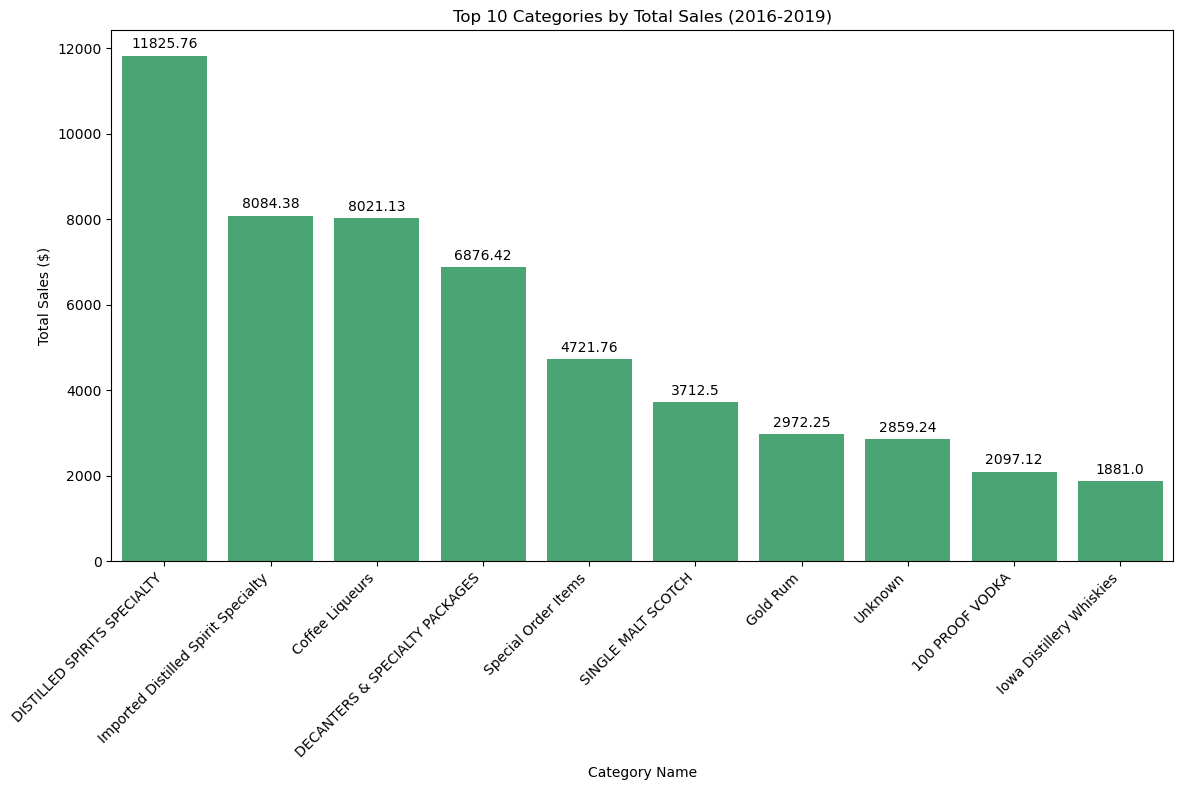

In [84]:
# Create a DataFrame from the Series
#Top 10 Categories
top_10_categories = total_sales_by_category.sort_values(ascending=False).head(10).reset_index()
top_10_categories.columns = ['Category', 'Total Sales']

#Barplot
plt.figure(figsize=(12, 8))
sns.barplot(x='Category', y='Total Sales', data=top_10_categories, color='mediumseagreen')

# Adding values on the bars using text
for index, value in enumerate(top_10_categories['Total Sales']):
    plt.text(index, value + 100, f'{round(value, 2)}', ha='center', va='bottom')

# Adding labels and title
plt.title('Top 10 Categories by Total Sales (2016-2019)')
plt.xlabel('Category Name')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

### 3.5 Total Sales per Year

The following bar chart displays the total sales for each year.

- The chart confirms the peak in **2016** and the recovery in **2019**.
- The drop in **2017–2018** is visually noticeable and supports the data analysis findings.


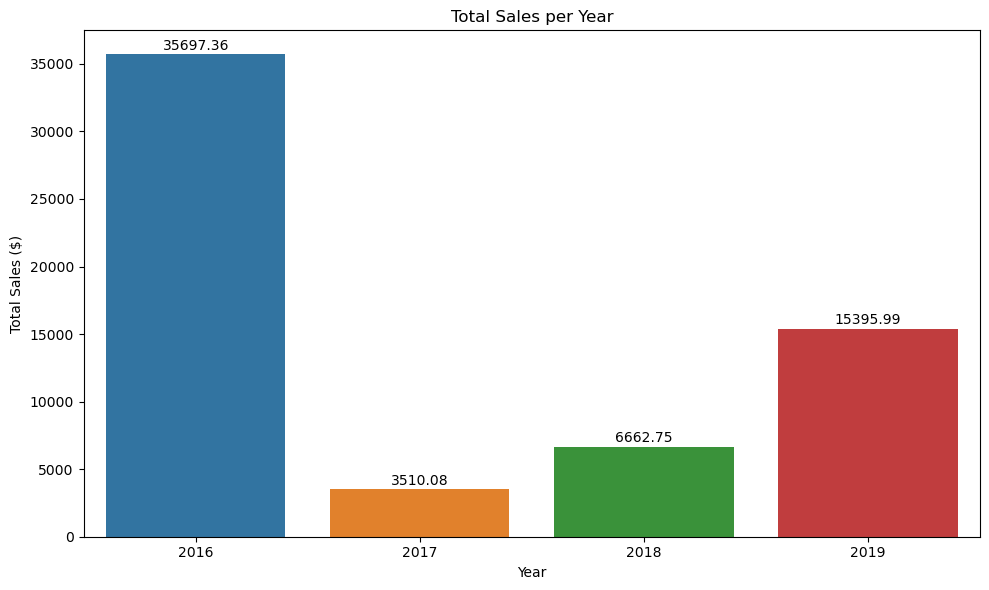

In [86]:
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_year, x='year', y='sale_dollars')

# Adding values on the bars using text
for index, value in enumerate(sales_by_year['sale_dollars']):
    plt.text(index, value + 100, f'{round(value, 2)}', ha='center', va='bottom')

plt.title('Total Sales per Year')
plt.xlabel('Year')
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.show()

## 4. Conclusions

Based on our analysis of liquor sales data for the period 2016–2019, we derived several key insights with practical implications:

---

**1. Consumer Preferences Vary by Region**

By identifying the top-selling product in each zip code, we observed that preferences differ significantly across regions. This suggests that a one-size-fits-all inventory approach may not be optimal. Tailoring product offerings to local demand can increase sales and customer satisfaction.

---

**2. A Small Number of Stores Drive a Large Share of Revenue**

The sales percentage analysis showed that a few stores contribute disproportionately to total revenue. These high-performing locations can serve as benchmarks for operational excellence and may justify increased investment in inventory, staffing, or marketing.

---

**3. Certain Products and Categories Dominate Revenue**

Revenue from liquor sales is heavily concentrated in a relatively small number of products and categories. Prioritizing these high-impact items can optimize shelf space, promotional efforts, and supplier negotiations.

---

**4. Regional Insights Support Targeted Marketing**

Sales by zip code revealed areas with higher liquor consumption. These hotspots present opportunities for localized promotions, store expansion, or enhanced distribution efforts.

---

**5. Category Analysis Enables Strategic Planning**

Sales distribution by category provides visibility into customer preferences at a broader level. Understanding which liquor types are most profitable allows for better forecasting and category-level budget allocation.

---

**6. Sales Trend Summary**

- The analysis shows a clear peak in **2016**.
- A notable sales drop occurred in **2017** and **2018**.
- **2019** marked the beginning of a recovery trend.
- This fluctuation may be attributed to external market conditions, inventory availability, or operational changes.

Understanding this trend helps highlight the need to investigate what drove the high performance in 2016 and what changed in the following years.

---

**Overall Recommendation:**

To maximize revenue and operational efficiency, stakeholders should leverage these insights to implement more tailored, data-driven strategies. Specifically:

Customize inventory and marketing efforts based on regional preferences and high-performing zip codes.

Invest in top-performing stores that contribute disproportionately to revenue.

Prioritize best-selling products and categories to optimize shelf space and supplier negotiations.

Monitor yearly sales trends to understand performance drivers and adjust forecasts and goals accordingly.

Aligning product offerings, promotional efforts, and expansion strategies with these findings will support more informed decision-making and sustainable growth across the retail network.